## EDA OF Uber Fare Amount

#### Importing the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data/uber.csv", parse_dates=['pickup_datetime'])
df.drop(['Unnamed: 0','key'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
print(f'Inference: The Dataset consists of {df.shape[1]} features & {df.shape[0]} samples.')

Inference: The Dataset consists of 7 features & 200000 samples.


### Handling Missing Values

In [5]:
nullValues = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nullValues['Percentage'] = round(nullValues['Total Null Values']/df.shape[0],3)*100
print(nullValues)

                   Total Null Values  Percentage
fare_amount                        0         0.0
pickup_datetime                    0         0.0
pickup_longitude                   0         0.0
pickup_latitude                    0         0.0
passenger_count                    0         0.0
dropoff_longitude                  1         0.0
dropoff_latitude                   1         0.0


In [6]:
df[df['dropoff_longitude'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,24.1,2013-07-02 03:51:57+00:00,-73.950581,40.779692,NaN,NaN,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()# after clean dataset

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df.duplicated().sum()#checking duplicate values

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


#### Observations

- Longitude and latitude values must be between -90 to 90. Some rows have inconsistent values
- Minimum fare amount is negative. May be an error.
- Maximum fare is significantly high. It needs to be analyzed.
- The minimum passenger count is 0 and max is 208. Both the values seem inconsistent.

In [12]:
df_delete = df[(df['pickup_latitude']>180) | (df['pickup_latitude']<-180)|
                    (df['dropoff_latitude']>180) | (df['dropoff_latitude']< -180)|
                    (df['pickup_longitude']>90) | (df['pickup_longitude']<-90) |
                    (df['dropoff_longitude']>90) | (df['dropoff_longitude']<-90)]
df_delete.shape

(13, 7)

In [13]:
index_to_delete = df_delete.index
index_to_delete

Index([  4949,  32549,  40908,  48506,  56617,  61793,  75851,  91422, 103745,
       139447, 144253, 161652, 199936],
      dtype='int64')

Since only 13 rows out of 200000 records have inconsistent values in latitude and longitude columns, we can drop these rows.

In [14]:
before = df.shape
df.drop(index_to_delete,inplace=True)
print(f'before :{before[0]},after :{df.shape[0]}')

before :199999,after :199986


In [15]:
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

In [16]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [17]:
df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

df['Hourly_Segments'] = df.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

In [18]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Monthly_Quarter,Hourly_Segments
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2,H5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3,H6
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3,H6
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2,H3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Q3,H5


In [19]:
df.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5


#### Problem can be solved using Haversine formula
👉🏻 [reference from GeekForGeeks](https://www.geeksforgeeks.org/program-distance-two-points-earth/)

```
Find the value of the latitude in radians:
Value of Latitude in Radians, lat = Latitude / (180/pi) OR
Value of Latitude in Radians, lat = Latitude / 57.29577951
Find the value of longitude in radians:
Value of Longitude in Radians, long = Longitude / (180/pi) OR
Value of Longitude in Radians, long = Longitude / 57.29577951
```

Distance, d = 3963.0 * arccos[(sin(lat1) * sin(lat2)) + cos(lat1) * cos(lat2) * cos(long2 – long1)]

In [21]:
from math import radians, sin, cos, sqrt, asin

def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [22]:
df['distance_travelled']=distance_transform(df['pickup_longitude'].to_numpy(),
                                  df['pickup_latitude'].to_numpy(),
                                  df['dropoff_longitude'].to_numpy(),
                                  df['dropoff_latitude'].to_numpy())

df['distance_travelled'] = df['distance_travelled'].round(3)
## This Distance is in kilometers


In [23]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance_travelled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4.475


In [24]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,distance_travelled
count,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000
mean,11.359865,-72.501679,39.917919,-72.511699,39.922055,1.684548,2011.742477,3.048383,20.542992
std,9.901890,10.449873,6.130422,10.412139,6.117675,1.386002,1.856432,1.946965,379.542503
min,-52.000000,-89.933333,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733824,1.000000,2010.000000,1.000000,1.215000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2012.000000,3.000000,2.121000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768001,2.000000,2013.000000,5.000000,3.875000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,2015.000000,6.000000,8782.899000


In [25]:
df[df['fare_amount']<= 0].shape

(22, 11)

In [26]:
old_shape = df.shape

In [27]:
df_fare_delete = df[df['fare_amount']<=0]
df_fare_delete.shape

(22, 11)

In [28]:
index_to_delete_fare = df_fare_delete.index
df.drop(index_to_delete_fare,inplace=True)

In [29]:
print(f"Number of items removed : {old_shape[0] - df.shape[0]}")

Number of items removed : 22


In [30]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,distance_travelled
count,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000
mean,11.362560,-72.501889,39.918031,-72.512649,39.922574,1.684493,2011.742344,3.048409,20.458319
std,9.897193,10.449179,6.130103,10.408913,6.116051,1.385979,1.856312,1.946990,378.577233
min,0.010000,-89.933333,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734792,-73.991407,40.733825,1.000000,2010.000000,1.000000,1.215000
50%,8.500000,-73.981822,40.752590,-73.980092,40.753042,1.000000,2012.000000,3.000000,2.121000
75%,12.500000,-73.967155,40.767157,-73.963659,40.768000,2.000000,2013.000000,5.000000,3.875000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,2015.000000,6.000000,8782.899000


Maximum fare can be analyzed later when distance covered during ride will be calculated

In [31]:
df['passenger_count'].value_counts()

passenger_count
1      138404
2       29423
5       14004
3        8878
4        4275
6        4271
0         708
208         1
Name: count, dtype: int64

Only 1 ride contains passenger count as 208, may be erroneous data. It can be dropped.

Around 708 rides show no passenger. It can be replaced with 1.

<Axes: xlabel='passenger_count', ylabel='count'>

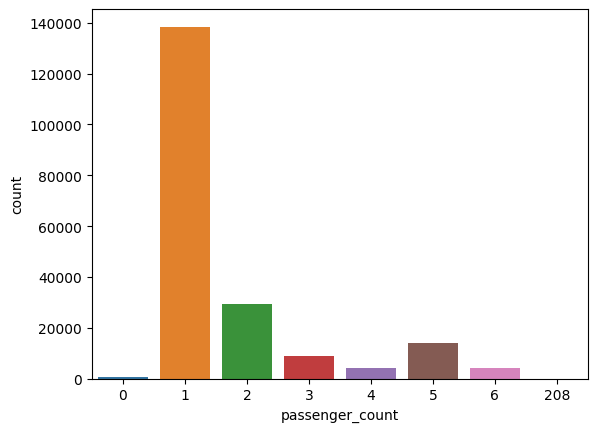

In [32]:
import seaborn as sns
#plt.figure(figsize=[8,4])
sns.countplot(data = df,x = 'passenger_count')

In [33]:
old_shape = df.shape
index_to_delete_passenger = df[df['passenger_count']==df['passenger_count'].max()].index
df.drop(index_to_delete_passenger,inplace=True)
print(f"After drop {old_shape[0] - df.shape[0]}")

After drop 1


In [34]:
# now the large passenger count is removed 208 column
df['passenger_count'].value_counts()

passenger_count
1    138404
2     29423
5     14004
3      8878
4      4275
6      4271
0       708
Name: count, dtype: int64

In [35]:
# here we will replace 0 with 1 count
df['passenger_count']=np.where(df['passenger_count']==0,1,df['passenger_count'])

In [36]:
df['passenger_count'].value_counts()

passenger_count
1    139112
2     29423
5     14004
3      8878
4      4275
6      4271
Name: count, dtype: int64

<Axes: xlabel='passenger_count', ylabel='count'>

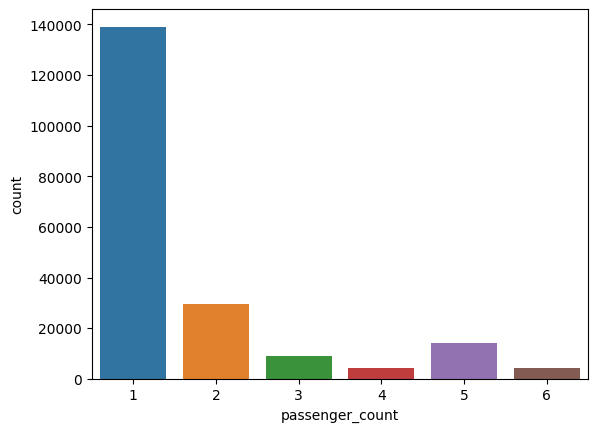

In [37]:
sns.countplot(data = df,x = 'passenger_count')

#### Using Real Map image and Assigning pick_pickup location lat and long Values to the map image

In [38]:
from PIL import Image
import numpy as np
import requests
image=Image.open(requests.get("https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/wm.png", stream=True).raw)
image_array=np.array(image)

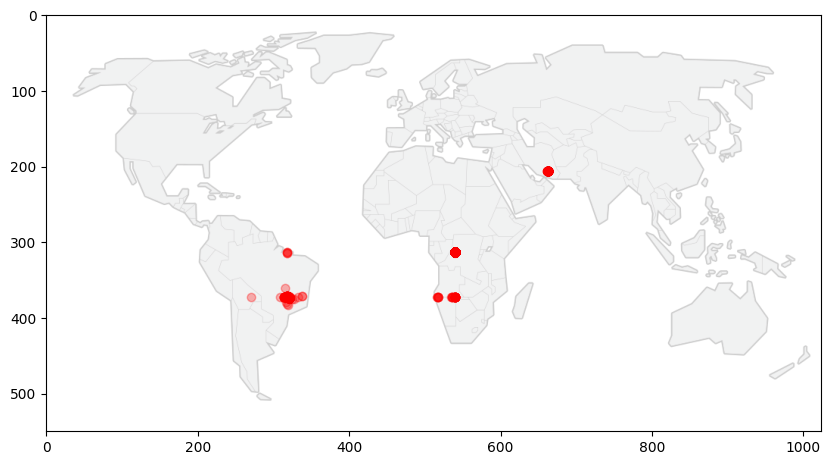

In [39]:
plt.figure(figsize=[10,10])
plt.imshow(image_array, alpha=0.2)
plt.scatter((df.pickup_longitude+180)*3,(df.pickup_latitude+215)*1.45555555,alpha=0.3, color='red')
plt.show()

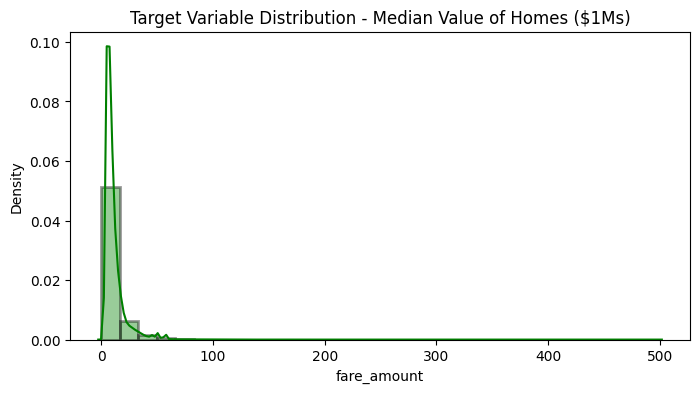

In [40]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df["fare_amount"], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

Inference:The Target Variable seems to be be highly skewed, with most datapoints lieing near 0.

In [41]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,distance_travelled
count,199963.000000,199963.000000,199963.000000,199963.000000,199963.000000,199963.000000,199963.000000,199963.000000,199963.000000
mean,11.362558,-72.501882,39.918026,-72.512641,39.922570,1.687002,2011.742352,3.048419,20.458421
std,9.897217,10.449205,6.130118,10.408939,6.116066,1.303719,1.856312,1.946989,378.578177
min,0.010000,-89.933333,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734792,-73.991407,40.733825,1.000000,2010.000000,1.000000,1.215000
50%,8.500000,-73.981822,40.752590,-73.980092,40.753042,1.000000,2012.000000,3.000000,2.121000
75%,12.500000,-73.967155,40.767157,-73.963659,40.768000,2.000000,2013.000000,5.000000,3.875000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,6.000000,8782.899000


In [42]:
# removing zero distance travel
index_to_delete_distance = df[df['distance_travelled'] == 0].index
df.drop(index_to_delete_distance,inplace=True)
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,distance_travelled
count,194247.000000,194247.000000,194247.000000,194247.000000,194247.000000,194247.000000,194247.000000,194247.000000,194247.000000
mean,11.349822,-73.826480,40.646902,-73.837556,40.651579,1.687413,2011.747420,3.048577,21.060440
std,9.722955,3.660507,2.931640,3.536295,2.900095,1.303961,1.859941,1.946791,384.091421
min,0.010000,-89.933333,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,0.000000,0.001000
25%,6.000000,-73.992269,40.736348,-73.991589,40.735220,1.000000,2010.000000,1.000000,1.283000
50%,8.500000,-73.982116,40.753253,-73.980539,40.753708,1.000000,2012.000000,3.000000,2.185000
75%,12.500000,-73.968400,40.767508,-73.965423,40.768314,2.000000,2013.000000,5.000000,3.961000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,6.000000,8782.899000


In [43]:
len(df[df.distance_travelled < 0.1])

1081

In [44]:
before = df.shape
df.drop(df[df.distance_travelled < 0.1].index, inplace=True)
print(f"before :{before[0]},after :{df.shape[0]}")

before :194247,after :193166


In [45]:
df_delete_lat_long = df[(df['pickup_longitude']==0) | (df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) ]
df_delete_lat_long

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance_travelled
346,15.50,0.000000,0.000000,-73.979805,40.786030,1,2015,3,Q1,H5,8666.398
1067,52.00,-73.781095,40.645015,0.000000,0.000000,1,2014,6,Q1,H6,8647.036
1526,2.50,-74.001849,40.715156,0.000000,0.000000,3,2014,0,Q2,H4,8666.772
2547,10.10,0.000000,0.000000,-73.953210,40.803528,2,2011,1,Q3,H6,8664.557
3045,15.00,0.000000,0.000000,-73.843777,40.739255,1,2013,1,Q1,H1,8654.177
...,...,...,...,...,...,...,...,...,...,...,...
196967,57.33,0.000000,0.000000,-73.789045,40.655135,2,2014,2,Q3,H3,8647.904
197468,6.90,0.000000,0.000000,-73.980827,40.747133,5,2011,2,Q1,H5,8665.686
197863,7.00,-73.962190,40.759158,0.000000,0.000000,1,2014,1,Q4,H6,8664.389
198567,23.50,-73.968115,40.801455,0.000000,0.000000,2,2013,0,Q4,H1,8665.747


```
As the above rows show some inconsistent data (as the latitude and longitude values for pickup and dropoff locations are all zeros which is the location in South Atlantic Ocean), we have dropped these rows.
```

In [46]:
old_shape = df.shape
index_to_delete_lat_long = df[(df['pickup_longitude']==0) | (df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) ].index
df.drop(index_to_delete_lat_long,inplace=True)
print(f"After drop {old_shape[0] - df.shape[0]}")

After drop 379


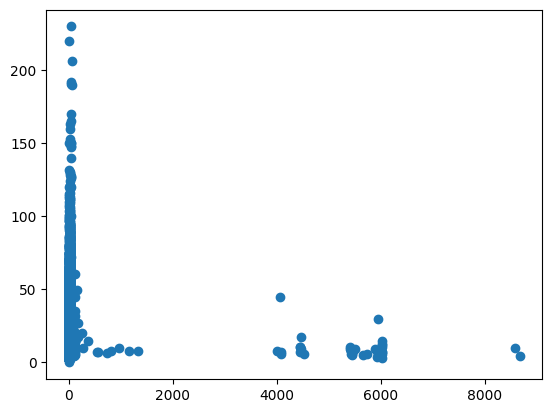

In [47]:
plt.scatter(data = df,x='distance_travelled',y='fare_amount')

In [48]:
for feature in ['fare_amount','distance_travelled']:

    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    upper_whisker = q3+1.5*iqr
    lower_whisker = q1-1.5*iqr
    print(str.upper(feature))
    print('Upper Whisker',upper_whisker)
    print('Lower Whisker',lower_whisker)
    print('************************************')

FARE_AMOUNT
Upper Whisker 22.25
Lower Whisker -3.75
************************************
DISTANCE_TRAVELLED
Upper Whisker 7.959
Lower Whisker -2.7049999999999996
************************************


<Axes: >

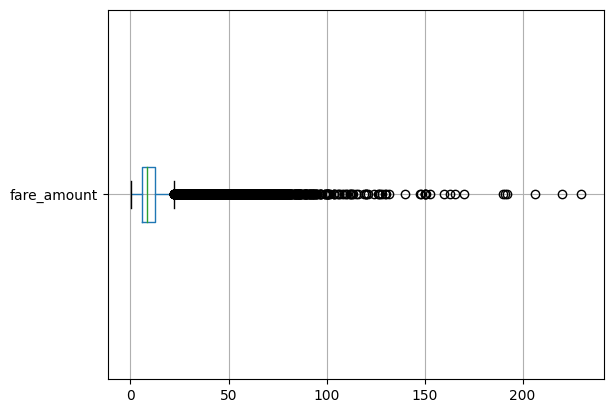

In [49]:
df[['fare_amount']].boxplot(vert=0)

In [50]:
# Outlier treatment
for feature in ['fare_amount','distance_travelled']:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    upper_whisker = q3+1.5*iqr
    lower_whisker = q1-1.5*iqr
    df[feature]=np.where(df[feature]<lower_whisker,lower_whisker,df[feature])
    df[feature]=np.where(df[feature]>upper_whisker,upper_whisker,df[feature])

<Axes: >

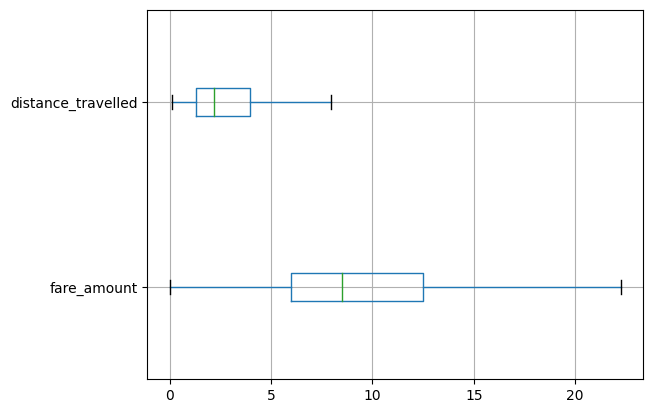

In [51]:
df[['fare_amount','distance_travelled']].boxplot(vert=0)

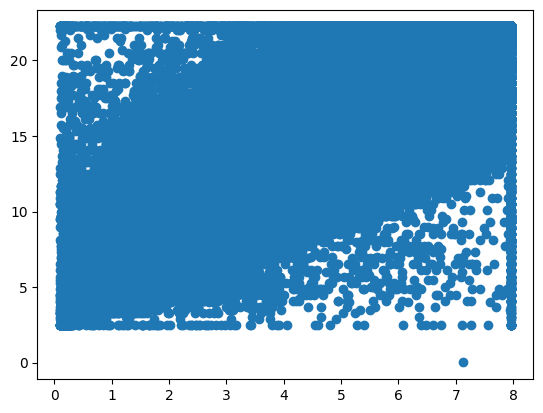

In [52]:
plt.scatter(data = df,x='distance_travelled',y='fare_amount')

In [53]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance_travelled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4.475


In [54]:
from IPython.display import Markdown, display

In [55]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

display(Markdown("***Categorical Variables Dataframe:***"))
display(cat.head())

display(Markdown("***Numeric Variables Dataframe:***"))
display(num.head())

***Categorical Variables Dataframe:***

,Monthly_Quarter,Hourly_Segments
0,Q2,H5
1,Q3,H6
2,Q3,H6
3,Q2,H3
4,Q3,H5


***Numeric Variables Dataframe:***

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,distance_travelled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,4.475


### Encoding the Categorical Features

In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [57]:
Hour_encoder = LabelEncoder()
Month_encoder = LabelEncoder()

df.Monthly_Quarter = Month_encoder.fit_transform(df.Monthly_Quarter)
df.Hourly_Segments = Hour_encoder.fit_transform(df.Hourly_Segments)

Hour_Segments_decoded = Hour_encoder.inverse_transform(df.Hourly_Segments)
print("Hour Segments Decoded Categories:", Hour_Segments_decoded)

Month_Segments_decoded = Month_encoder.inverse_transform(df.Monthly_Quarter)
print("Decoded Categories:", Month_Segments_decoded)

Hour Segments Decoded Categories: ['H5' 'H6' 'H6' ... 'H1' 'H4' 'H2']
Decoded Categories: ['Q2' 'Q3' 'Q3' ... 'Q2' 'Q2' 'Q2']


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192787 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         192787 non-null  float64
 1   pickup_longitude    192787 non-null  float64
 2   pickup_latitude     192787 non-null  float64
 3   dropoff_longitude   192787 non-null  float64
 4   dropoff_latitude    192787 non-null  float64
 5   passenger_count     192787 non-null  int64  
 6   year                192787 non-null  int32  
 7   weekday             192787 non-null  int32  
 8   Monthly_Quarter     192787 non-null  int64  
 9   Hourly_Segments     192787 non-null  int64  
 10  distance_travelled  192787 non-null  float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 16.2 MB


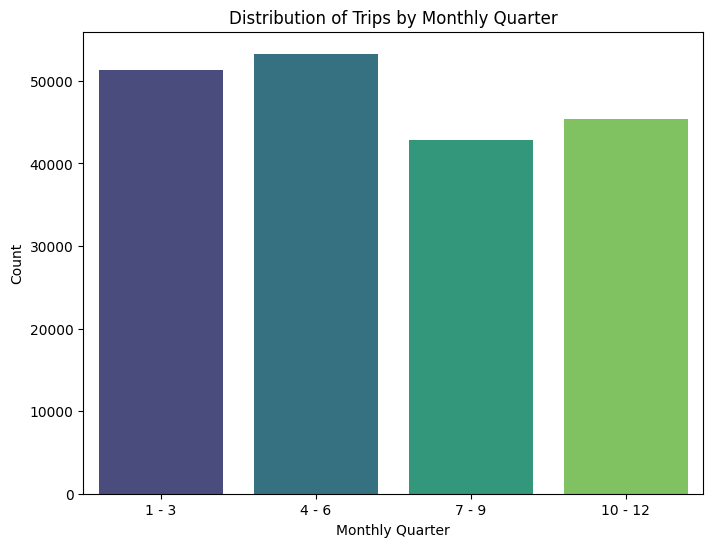

In [59]:
monthly_labels = ['1 - 3', '4 - 6', '7 - 9', '10 - 12'] 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Monthly_Quarter', palette='viridis')
plt.xlabel('Monthly Quarter')
plt.ylabel('Count')
plt.title('Distribution of Trips by Monthly Quarter')

plt.xticks(ticks=range(len(monthly_labels)), labels=monthly_labels)

plt.show()

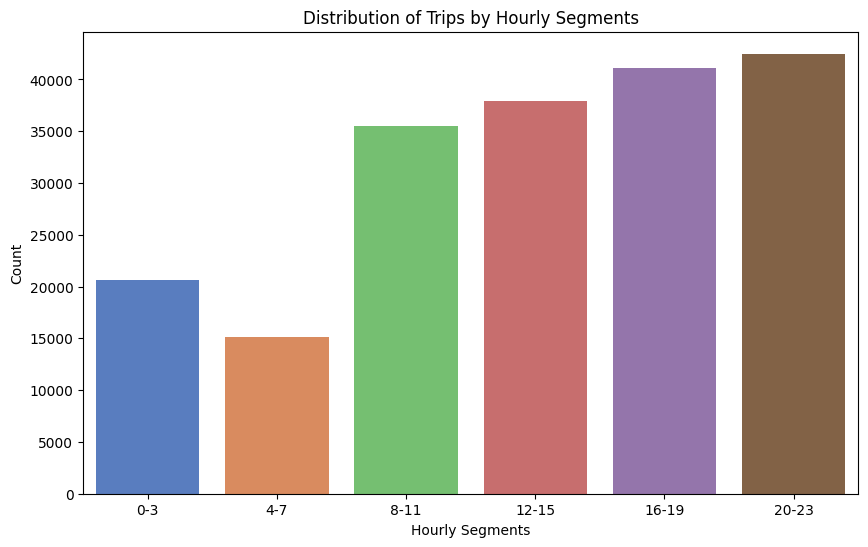

In [60]:
hourly_segment_labels = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hourly_Segments', palette='muted')
plt.xlabel('Hourly Segments')
plt.ylabel('Count')
plt.title('Distribution of Trips by Hourly Segments')

plt.xticks(ticks=range(len(hourly_segment_labels)), labels=hourly_segment_labels)
plt.show()

In [61]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance_travelled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,1,4,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,2,5,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,2,5,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,1,2,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,2,4,4.475


In [62]:
counter = 0
rows,columns = df.shape

df.drop_duplicates(inplace=True)
df.drop(['pickup_latitude','pickup_longitude',
         'dropoff_latitude','dropoff_longitude'],axis=1)

if df.shape==(rows,columns):
    print('Inference: The dataset doesn\'t have any duplicates')
else:
    print(f'Inference: Number of duplicates dropped fixed ---> {rows-df.shape[0]}')

Inference: The dataset doesn't have any duplicates


Text(0, 0.5, 'Fare amount')

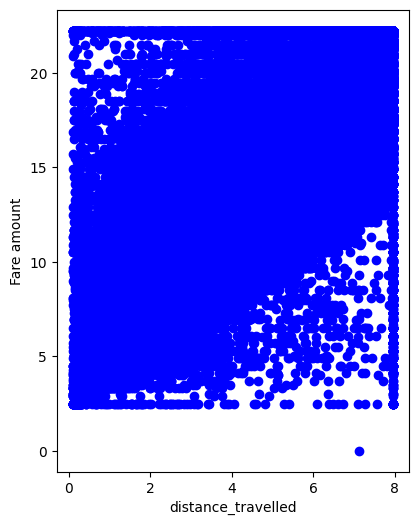

In [63]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(df.distance_travelled, df['fare_amount'], color='blue')
plt.xlabel('distance_travelled')
plt.ylabel('Fare amount')

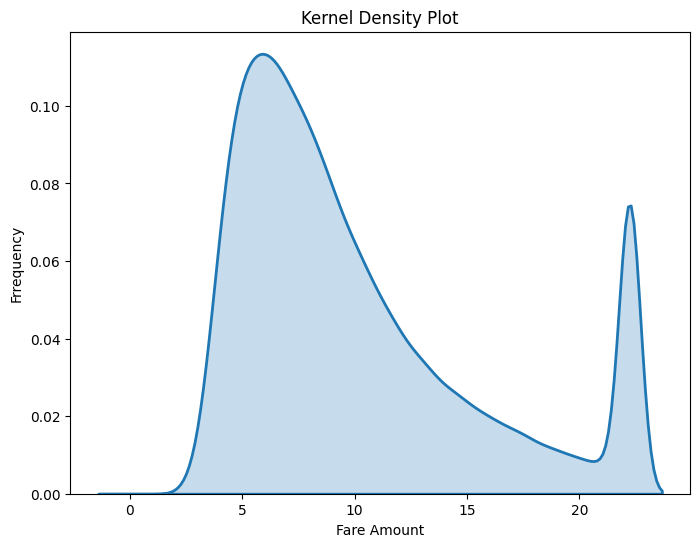

In [64]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df.fare_amount, fill=True, linewidth=2)
plt.xlabel('Fare Amount')
plt.ylabel('Frrequency')
plt.title('Kernel Density Plot')
plt.show()

In [65]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance_travelled
count,192787.000000,192787.000000,192787.000000,192787.000000,192787.000000,192787.000000,192787.000000,192787.000000,192787.000000,192787.000000,192787.000000
mean,10.101971,-73.905464,40.687945,-73.905118,40.687386,1.688464,2011.746752,3.049059,1.427114,2.992448,2.952360
std,5.410046,2.752196,2.630297,2.742568,2.635747,1.304705,1.859275,1.946567,1.116818,1.598328,2.204943
min,0.010000,-89.933333,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,0.000000,0.000000,0.000000,0.100000
25%,6.000000,-73.992277,40.736474,-73.991595,40.735337,1.000000,2010.000000,1.000000,0.000000,2.000000,1.294000
50%,8.500000,-73.982135,40.753307,-73.980572,40.753753,1.000000,2012.000000,3.000000,1.000000,3.000000,2.193000
75%,12.500000,-73.968510,40.767558,-73.965583,40.768342,2.000000,2013.000000,5.000000,2.000000,4.000000,3.960000
max,22.250000,40.808425,48.018760,40.831932,42.464187,6.000000,2015.000000,6.000000,3.000000,5.000000,7.959000


Text(0, 0.5, 'Frequency')

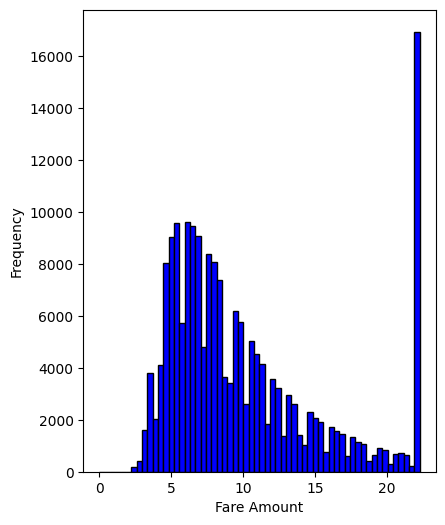

In [66]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['fare_amount'], bins=60, edgecolor='black', color='blue')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')

## Feature Selection

#### 1. Pearson's Correlation feature Selection

- for (Numerical Input, Numerical Output) we use Pearson's Correlation feature Selection Regression Feature Selection

In [67]:
features =  ['passenger_count', 'year',
             'weekday', 'Monthly_Quarter', 
             'Hourly_Segments', 'distance_travelled']

target = 'fare_amount'

In [68]:
# Splitting Data into X and Y
X, y = df[features], df[target]

In [69]:
from sklearn.feature_selection import SelectKBest, f_regression

In [70]:
selector = SelectKBest(score_func=f_regression, k=6)
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

print("Selected features:\n")
print('\n'.join(map(str, selected_features)))


Selected features:

passenger_count
year
weekday
Monthly_Quarter
Hourly_Segments
distance_travelled


### 2. Spearman's Correlation 

In [71]:
spearman_matrix = df.corr(method='spearman')
spearman_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance_travelled
fare_amount,1.000000,0.045034,-0.075815,0.110574,-0.090162,0.023047,0.150042,0.014103,0.030520,-0.008056,0.865969
pickup_longitude,0.045034,1.000000,0.609805,0.356762,0.284369,-0.016445,0.007177,-0.033616,-0.001011,0.005104,0.056478
pickup_latitude,-0.075815,0.609805,1.000000,0.264285,0.461130,-0.017847,-0.009155,-0.052257,0.002030,0.017797,-0.060333
dropoff_longitude,0.110574,0.356762,0.264285,1.000000,0.557915,-0.012891,0.009674,-0.017006,0.000535,-0.034735,0.141598
dropoff_latitude,-0.090162,0.284369,0.461130,0.557915,1.000000,-0.010512,-0.006379,-0.039589,0.000017,0.003999,-0.053321
passenger_count,0.023047,-0.016445,-0.017847,-0.012891,-0.010512,1.000000,-0.013357,0.056964,0.009089,0.033361,0.013107
year,0.150042,0.007177,-0.009155,0.009674,-0.006379,-0.013357,1.000000,0.005942,-0.111136,0.001067,0.014336
weekday,0.014103,-0.033616,-0.052257,-0.017006,-0.039589,0.056964,0.005942,1.000000,-0.009147,-0.067270,0.033667
Monthly_Quarter,0.030520,-0.001011,0.002030,0.000535,0.000017,0.009089,-0.111136,-0.009147,1.000000,-0.003894,0.014386
Hourly_Segments,-0.008056,0.005104,0.017797,-0.034735,0.003999,0.033361,0.001067,-0.067270,-0.003894,1.000000,-0.011411


In [72]:
abs_corr_values = spearman_matrix.abs()
top_features = abs_corr_values.mean().sort_values().head(6)
top_features

Monthly_Quarter       0.107433
Hourly_Segments       0.107881
passenger_count       0.109693
year                  0.120752
weekday               0.120869
distance_travelled    0.205873
dtype: float64

<Axes: >

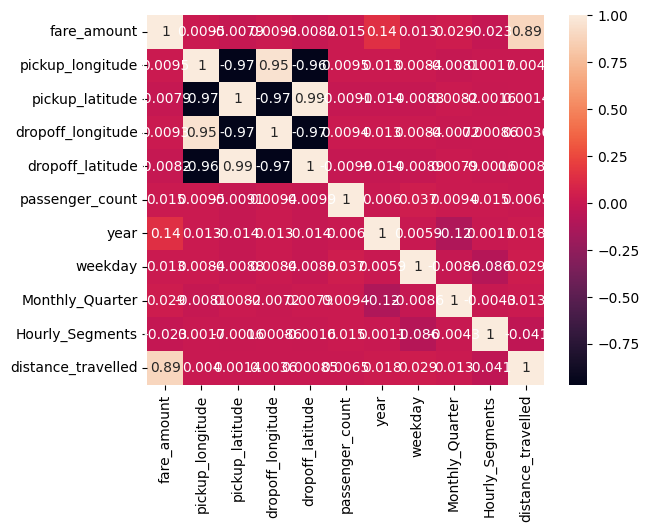

In [73]:
# heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

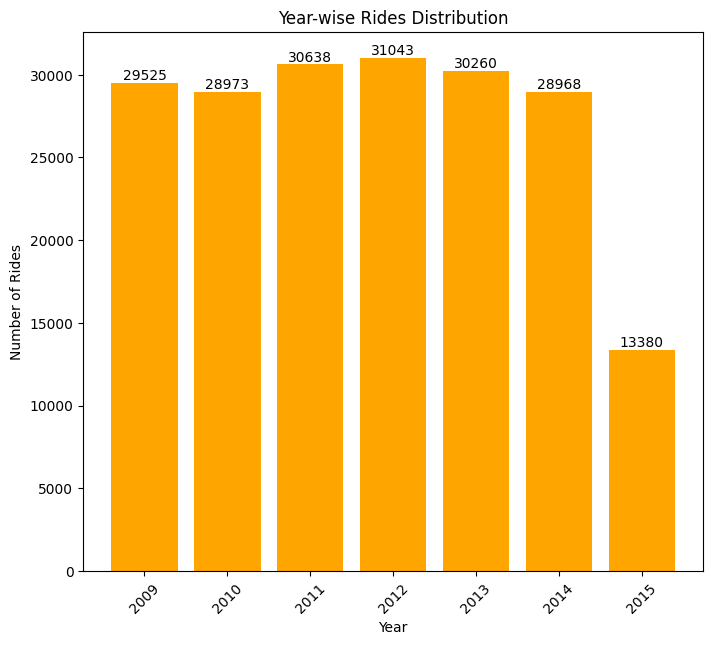

In [74]:
year_counts = df['year'].value_counts()
year_counts = year_counts.sort_index()

plt.figure(figsize=(8, 7))

plt.bar(year_counts.index, year_counts.values, color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.title('Year-wise Rides Distribution')

for x, y in zip(year_counts.index, year_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
    
plt.xticks(rotation=45)
plt.show()